In [1]:
# Import the numpy module to provide numerical functionality
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo

In [2]:
hdulist = fits.open('dr16_eboss_simplefit_v1.fit')

In [3]:
head = hdulist[1].data
infheader = head.columns
infheader

ColDefs(
    name = 'PLATE'; format = 'I'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'I'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'BOSS_TARGET1'; format = 'J'
    name = 'BOSS_TARGET2'; format = 'J'
    name = 'TARGET_TYPE'; format = '16A'
    name = 'TARGET_TEXT'; format = '78A'
    name = 'EBV_SFD'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'VDISP'; format = 'E'
    name = 'VDISP_ERR'; format = 'E'
    name = 'SN_MEDIAN'; format = 'E'
    name = 'DIST_MPC'; format = 'E'
    name = 'MSTAR_FIBER'; format = 'E'
    name = 'MSTAR_TOT'; format = 'E'
    name = 'TAUV'; format = 'D'
    name = 'TAUV_ERR'; format = 'D'
    name = 'LIGHT_FRAC'; format = '12D'
    name = 'LIGHT_FRAC_ERR'; format = '12D'
    name = 'CHISQ'; format = 'D'
    name = 'ECOEF'; format = '104E'
    name = 'V_OFF'; format = 'E'
    name = 'V_OFF_ERR'; format = 'E'
    name = 'SIGMA'; format = 'E'
    name = 'SIGMA_ERR'; format = 'E'
    name = 'BROAD_V_OFF';

In [4]:
OIII = hdulist[1].data['OIII_5007_FLUX']
NII = hdulist[1].data['NII_6584_FLUX']
BETA = hdulist[1].data['H_BETA_FLUX']
ALPHA = hdulist[1].data['H_ALPHA_FLUX']
ALPHAew = hdulist[1].data['H_ALPHA_EW']
OIIIerr = hdulist[1].data['OIII_5007_FLUX_ERR']
NIIerr = hdulist[1].data['NII_6584_FLUX_ERR']
NEV = hdulist[1].data['NeV_3426_FLUX']
NEVerr = hdulist[1].data['NeV_3426_FLUX_ERR']
NEVew = hdulist[1].data['NeV_3426_EW']
OIII4 = hdulist[1].data['OIII_4959_FLUX']
OIII4err = hdulist[1].data['OIII_4959_FLUX_ERR']
SIG = hdulist[1].data['SIGMA']
Z = hdulist[1].data['Z']
RA = hdulist[1].data['RA']
DEC = hdulist[1].data['DEC']

In [5]:
OIIIFIX = np.where((OIII > 3*OIIIerr) & (NII > 3*NIIerr) & (Z > .065))

In [6]:
ALPHANEW1 = ALPHA[OIIIFIX]
OIIINEW1 = OIII[OIIIFIX]
BETANEW1 = BETA[OIIIFIX]
NIINEW1 = NII[OIIIFIX]
ZNEWLINE = Z[OIIIFIX]
NEVCRAP = NEV[OIIIFIX]

In [7]:
OIIINEW = np.log10(OIIINEW1/BETANEW1)
NIINEW = np.log10(NIINEW1/ALPHANEW1)

C:\Users\Austin Warren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
C:\Users\Austin Warren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


In [8]:
X = np.linspace(-1.8,.45)
XII = np.linspace(-1.8,-0.18)
Y = (0.61/(X - 0.47) + 1.3)
YII = (0.61/(XII - 0.05) + 1.19)
YIII = (0.61/(XII - 0.02 - 0.1833*(np.median(ZNEWLINE,axis=0))))+1.2+0.03*(np.median(ZNEWLINE, axis=0))

Text(0.5, 1.0, 'BPT Diagram')

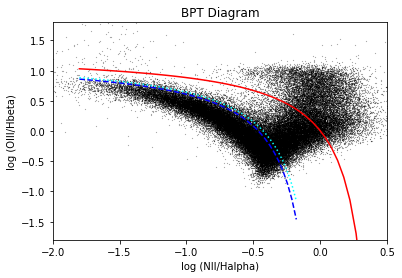

In [9]:
plt.figure()

plt.plot(NIINEW, OIIINEW,'.',color='black', markersize=.25)
plt.plot(X,Y,'-',color = 'red')
plt.plot(XII,YII,'--',color = 'blue')
plt.plot(XII,YIII,':',color = 'cyan')
plt.xlim([-2,.5])
plt.ylim([-1.8,1.8])

plt.xlabel('log (NII/Halpha)')
plt.ylabel('log (OIII/Hbeta)')
plt.title('BPT Diagram')

In [10]:
NEVFIX = np.where((NEV > 3*NEVerr) & (OIII > 3*OIIIerr) & (NII > 3*NIIerr) & (Z > .065) & (NEVew > 1) & (NEVerr != 0))

In [11]:
ALPHANEW2 = ALPHA[NEVFIX]
OIIINEW2 = OIII[NEVFIX]
OIIIerr2 = OIIIerr[NEVFIX]
BETANEW2 = BETA[NEVFIX]
NIINEW2 = NII[NEVFIX]
ALPHAew2 = ALPHAew[NEVFIX]
NEV2 = NEV[NEVFIX]
NEVew2 = NEVew[NEVFIX]
NEVerr2 = NEVerr[NEVFIX]
OIII4NEW = OIII4[NEVFIX]
SIGNEW = SIG[NEVFIX]
OIII4NEWerr = OIII4err[NEVFIX]
Z2 = Z[NEVFIX]
RA2 = RA[NEVFIX]
DEC2 = DEC[NEVFIX]
print(NEVew2)

[ 1.7197195  2.6447563  1.5821261 ...  2.236024   1.1621494 34.19676  ]


In [12]:
OIIIPLOT2 = np.log10(OIIINEW2/BETANEW2)
NIIPLOT2 = np.log10(NIINEW2/ALPHANEW2)

Text(0.5, 1.0, 'BPT Diagram')

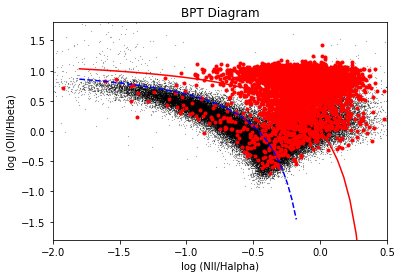

In [13]:
plt.figure()

plt.plot(NIINEW, OIIINEW,'.',color='black', markersize=.25)
plt.plot(NIIPLOT2,OIIIPLOT2,'.',color = 'red')
plt.plot(X,Y,'-',color = 'red')
plt.plot(XII,YII,'--',color = 'blue')
plt.xlim([-2,.5])
plt.ylim([-1.8,1.8])

plt.xlabel('log (NII/Halpha)')
plt.ylabel('log (OIII/Hbeta)')
plt.title('BPT Diagram')

In [14]:
OIIIFIXBLUE = np.where(((((0.61)/(NIINEW - 0.05)) + 1.19) > (OIIINEW)) & (NIINEW < .05))

C:\Users\Austin Warren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
C:\Users\Austin Warren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [15]:
ZFIXOIII = np.where((((0.61/(NIINEW - 0.02 - 0.1833*(ZNEWLINE)))+1.2+0.03*(ZNEWLINE)) > (OIIINEW)) & (NIINEW < .05))

C:\Users\Austin Warren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
C:\Users\Austin Warren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [16]:
np.median(ZNEWLINE,axis=0)

0.31589034

In [17]:
OIIIFIXBLUE2 = np.where(((((0.61)/(NIIPLOT2 - 0.05)) + 1.19) > (OIIIPLOT2)) & (NIIPLOT2 < .05))
Z2FIXOIII = np.where((((0.61/(NIIPLOT2 - 0.02 - 0.1833*(Z2)))+1.2+0.03*(Z2)) > (OIIIPLOT2)) & (NIIPLOT2 < 0))
OIIIFIXBLUE3 = np.where(((((0.61)/(NIIPLOT2 - 0.47) + 1.3)) < (OIIIPLOT2)))

In [18]:
OIIINEWTEST = OIIINEW[OIIIFIXBLUE]
NIINEWTEST = NIINEW[OIIIFIXBLUE]
OIIINEWTEST2 = OIIIPLOT2[OIIIFIXBLUE3]
NIINEWTEST2 = NIIPLOT2[OIIIFIXBLUE3]
NEV2NEW = NEV2[OIIIFIXBLUE3]
NEV2NEWstar = NEV2[OIIIFIXBLUE2]
Zstarall = ZNEWLINE[OIIIFIXBLUE]
Zstar = Z2[OIIIFIXBLUE2]
NEVCRAP2 = NEVCRAP[OIIIFIXBLUE]

In [19]:
NII2NEW = NIIPLOT2[OIIIFIXBLUE2]
OIII2NEW = OIIIPLOT2[OIIIFIXBLUE2]
OIIIfluxtest = OIIINEW2[OIIIFIXBLUE2]
OIIIerrtest = OIIIerr2[OIIIFIXBLUE2]
OIIIfluxagn = OIIINEW2[OIIIFIXBLUE3]
OIIIfluxerragn = OIIIerr2[OIIIFIXBLUE3]
OIII4fluxtest = OIII4NEW[OIIIFIXBLUE2]
SIGfluxtest = SIGNEW[OIIIFIXBLUE2]
OIII4fluxerr = OIII4NEWerr[OIIIFIXBLUE2]
RAtxt = RA2[OIIIFIXBLUE2]
DECtxt = DEC2[OIIIFIXBLUE2]
Zfluxagn = Z2[OIIIFIXBLUE3]
NEVAGN = NEV2[OIIIFIXBLUE3]

In [20]:
FIXNEV2 = np.where(NEV2NEWstar/OIIIfluxtest < .25)
NII2NEWNEV = NII2NEW[FIXNEV2]
OIII2NEWNEV = OIII2NEW[FIXNEV2]
Zstar2 = Zstar[FIXNEV2]
NEV2NEWstar2 = NEV2NEWstar[FIXNEV2]

In [21]:
len(NIINEWTEST2)

4032

In [22]:
len(NIINEWTEST)

30432

Text(0.5, 1.0, 'BPT Diagram')

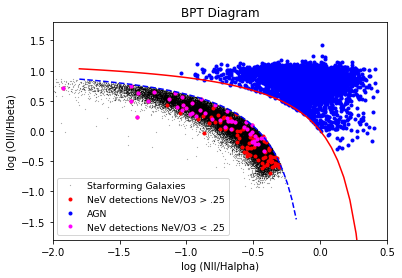

In [23]:
plt.figure()

plt.plot(NIINEWTEST, OIIINEWTEST,'.',color='black', markersize=.25, label="Starforming Galaxies")
plt.plot(NII2NEW,OIII2NEW,'.',color = 'red', label="NeV detections NeV/O3 > .25")
plt.plot(NIINEWTEST2,OIIINEWTEST2,'.',color = 'blue', label="AGN")
plt.plot(NII2NEWNEV,OIII2NEWNEV,'.',color = 'fuchsia', label="NeV detections NeV/O3 < .25")
plt.plot(X,Y,'-',color = 'red')
plt.plot(XII,YII,'--',color = 'blue')
plt.legend(loc="lower left", prop={'size': 9.3})
plt.xlim([-2,.5])
plt.ylim([-1.8,1.8])

plt.xlabel('log (NII/Halpha)')
plt.ylabel('log (OIII/Hbeta)')
plt.title('BPT Diagram')

In [24]:
NEVSN = NEV2/NEVerr2

In [25]:
#print(NEVSN[OIIIFIXBLUE2],NEVew2[OIIIFIXBLUE2],ALPHAew2[OIIIFIXBLUE2],Z2[OIIIFIXBLUE2],NEVerr2[OIIIFIXBLUE2])

In [26]:
plateh = hdulist[1].data['PLATE']
fiberh = hdulist[1].data['FIBERID']
mjdh = hdulist[1].data['MJD']

In [27]:
print(plateh)

[10000 10000 10000 ...  9632  9632  9632]


In [28]:
platem = plateh[NEVFIX]
fiberm = fiberh[NEVFIX]
mjdm = mjdh[NEVFIX]

In [29]:
platex = platem[OIIIFIXBLUE2]
fiberx = fiberm[OIIIFIXBLUE2]
mjdx = mjdm[OIIIFIXBLUE2]

In [30]:
platef = platex[FIXNEV2]
fiberf = fiberx[FIXNEV2]
mjdf = mjdx[FIXNEV2]
RAfin = RAtxt[FIXNEV2]
DECfin = DECtxt[FIXNEV2]

In [31]:
fibern = [str(item).zfill(4) for item in fiberx]
with open('starformspecs.txt', 'w+') as text_file: # this loop creates a new file called and writes to it, line-by-line
    for p, f, m, in zip(platex, fibern, mjdx):
        line_write = 'https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/{}/spec-{}-{}-{}.fits'.format(p, p, m, f)
        text_file.write(line_write + '\n')

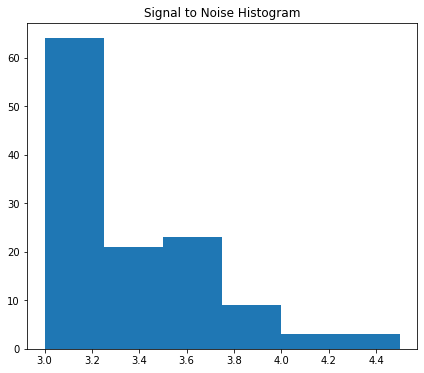

In [32]:
fig, ax = plt.subplots(figsize =(7, 6))
ax.hist(NEVSN[OIIIFIXBLUE2], bins = [3, 3.25, 3.50, 3.75, 4, 4.25, 4.5])
plt.title('Signal to Noise Histogram')

plt.show()

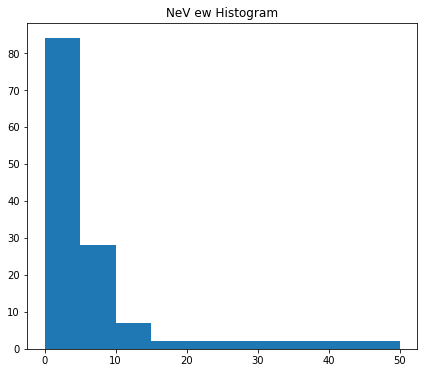

In [33]:
fig, ax = plt.subplots(figsize =(7, 6))
ax.hist(NEVew2[OIIIFIXBLUE2], bins = [0,5,10,15,20,50])
plt.title('NeV ew Histogram')

plt.show()

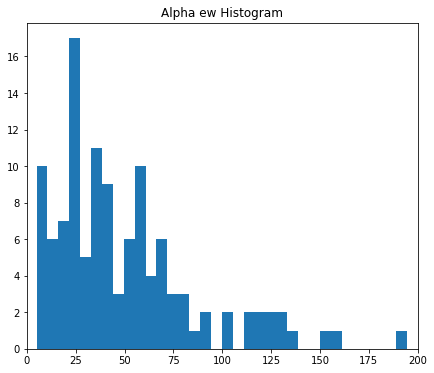

In [34]:
fig, ax = plt.subplots(figsize =(7, 6))
ax.hist(ALPHAew2[OIIIFIXBLUE2], bins = 160)
plt.title('Alpha ew Histogram')
plt.xlim([0,200])

plt.show()

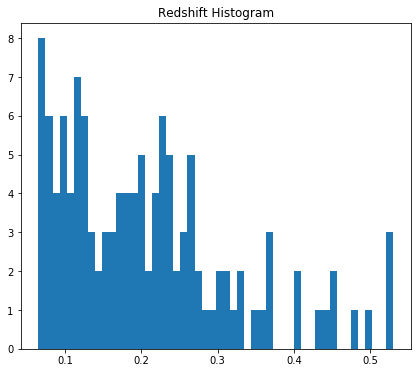

In [35]:
fig, ax = plt.subplots(figsize =(7, 6))
ax.hist(Z2[OIIIFIXBLUE2], bins = 50)
plt.title('Redshift Histogram')

plt.show()

In [36]:
n2 = hdulist[1].data['NII_6584_FLUX'].tolist()
n2_err = hdulist[1].data['NII_6584_FLUX_ERR'].tolist()
ha = hdulist[1].data['H_ALPHA_FLUX'].tolist()
ha_err = hdulist[1].data['H_ALPHA_FLUX_ERR'].tolist()
o3 = hdulist[1].data['OIII_5007_FLUX'].tolist()
o3_err = hdulist[1].data['OIII_5007_FLUX_ERR'].tolist()
hb = hdulist[1].data['H_BETA_FLUX'].tolist()
hb_err = hdulist[1].data['H_BETA_FLUX_err'].tolist()
nev = hdulist[1].data['NEV_3426_FLUX'].tolist()
nev_err = hdulist[1].data['NEV_3426_FLUX_ERR'].tolist()
nev_ew = hdulist[1].data['NEV_3426_EW'].tolist()
z = hdulist[1].data['Z'].tolist()
plate = hdulist[1].data['PLATE'].tolist()
mjd = hdulist[1].data['MJD'].tolist()
fiber = hdulist[1].data['FIBERID'].tolist()

data_df = {'n2':n2, 'n2_err':n2_err, 
          'ha':ha, 'ha_err':ha_err, 
          'o3':o3, 'o3_err':o3_err, 
          'hb':hb, 'hb_err':hb_err, 
          'nev':nev, 'nev_err':nev_err, 'nev_ew':nev_ew, 
          'z':z, 'plate':plate, 'mjd':mjd, 'fiber':fiber}

df = pd.DataFrame(data_df)

df = df.where((df.o3 > 3*(df.o3_err)) & (df.n2 > 3*(df.n2_err)))
df['x'] = np.log10(df['n2']/df['ha'])
df['y'] = np.log10(df['o3']/df['hb'])
df['ratio_NeO'] = (df['nev']/df['o3'])
df['s/n_O'] = (df['o3']/df['o3_err'])
df['s/n_Ne'] = (df['nev']/df['nev_err'])
df['dcmOAGN'] = ((cosmo.luminosity_distance(df['z']))*(1/u.Mpc))*(3.086E+24)
df['LNEVAGN'] = (4)*(np.pi)*(df['nev'])*(df['dcmOAGN']**2)*(10**-17)
df['LOAGN'] = (4)*(np.pi)*(df['o3'])*(df['dcmOAGN']**2)*(10**-17)
df['OAGNbol_lumin'] = ((0.5617)*(np.log10(df['LOAGN'])))+(22.186)
#df['ratioAGN'] = (df['LOAGN']/df['LNEVAGN'])
#median_ratioAGN = np.median(df['ratioAGN'])
df['LcorAGN'] = df['LNEVAGN']*(15.031228538592547)
df['LcorAGNdiv'] = df['LcorAGN']/1e38
df = df.where( (df.nev > 3*df.nev_err) & (df.o3 > 3*df.o3_err) & (df.n2 > 3*df.n2_err) & (df.z > 0.065) & (df.nev_ew > 1) & (df.nev_err != 0)  )
df = df.where(((((0.61)/(df.x - 0.05)) + 1.19) > (df.y)) & (df.x < 0))
#df = df.where(((((0.61)/(df.x - 0.47) + 1.3)) < (df.y)))
df = df.dropna()

C:\Users\Austin Warren\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10
C:\Users\Austin Warren\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10
C:\Users\Austin Warren\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [37]:
pd.set_option('display.max_rows', 135)

In [38]:
#median_ratioAGN = np.median(df['ratioAGN'])

In [39]:
#print(median_ratioAGN)

In [40]:
#df['ratioAGN'].median()

(0, 10)

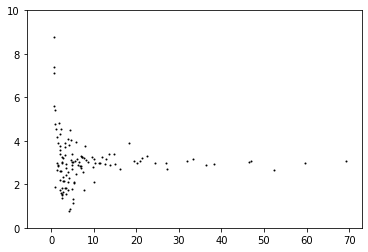

In [41]:
plt.figure()

plt.plot((OIII4fluxtest/OIII4fluxerr),(OIIIfluxtest/OIII4fluxtest),'.',color='black', markersize=2)
plt.ylim([0,10])

In [42]:
#df.to_excel("histstarformexcel.xlsx")

(0, 2)

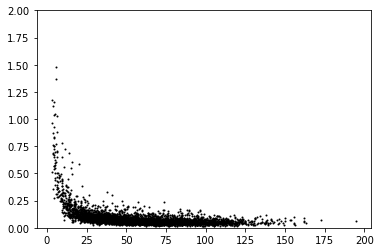

In [43]:
plt.figure()

plt.plot((OIIIfluxagn/OIIIfluxerragn),(NEV2NEW/OIIIfluxagn),'.',color='black', markersize=2)
plt.ylim([0,2])

(0, 200)

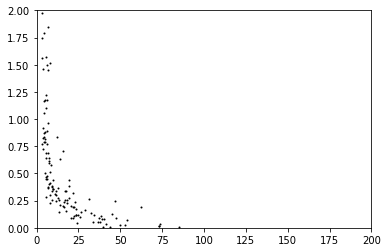

In [44]:
plt.figure()

plt.plot((OIIIfluxtest/OIIIerrtest),(NEV2NEWstar/OIIIfluxtest),'.',color='black', markersize=2)
plt.ylim([0,2])
plt.xlim([0,200])

In [45]:
#fibert = [str(item).zfill(4) for item in fiberf]
#with open('starformpicsfinal.txt', 'w+') as text_file: # this loop creates a new file called and writes to it, line-by-line
    #for r, d, p, f, m, in zip(RAfin, DECfin, platef, fibert, mjdf):
        #line_write = '{}-{}-{}  {}  {}'.format(p, m, f, r, d)
        #text_file.write(line_write + '\n')

In [46]:
OIIINEWTESTZ = OIIINEW[ZFIXOIII]
NIINEWTESTZ = NIINEW[ZFIXOIII]
NII2NEWZ = NIIPLOT2[Z2FIXOIII]
OIII2NEWZ = OIIIPLOT2[Z2FIXOIII]
NEV2NEWstarZ = NEV2[Z2FIXOIII]
OIIIfluxtestZ = OIIINEW2[Z2FIXOIII]
RAtxtz = RA2[Z2FIXOIII]
DECtxtz = DEC2[Z2FIXOIII]

In [47]:
FIXNEV2Z = np.where(NEV2NEWstarZ/OIIIfluxtestZ < .25)
NII2NEWNEVZ = NII2NEWZ[FIXNEV2Z]
OIII2NEWNEVZ = OIII2NEWZ[FIXNEV2Z]
RAtxtzfin = RAtxtz[FIXNEV2Z]
DECtxtzfin = DECtxtz[FIXNEV2Z]
plate2 = platem[Z2FIXOIII]
fiber2 = fiberm[Z2FIXOIII]
mjd2 = mjdm[Z2FIXOIII]

In [48]:
platefin = plate2[FIXNEV2Z]
fiberfin = fiber2[FIXNEV2Z]
mjdfin = mjd2[FIXNEV2Z]

In [49]:
fiberfinz = [str(item).zfill(4) for item in fiberfin]
with open('starformpicsfinalZ.txt', 'w+') as text_file: # this loop creates a new file called and writes to it, line-by-line
    for r, d, p, f, m, in zip(RAtxtzfin, DECtxtzfin, platefin, fiberfinz, mjdfin):
        line_write = '{}-{}-{}  {}  {}'.format(p, m, f, r, d)
        text_file.write(line_write + '\n')

Text(0.5, 1.0, 'BPT Diagram')

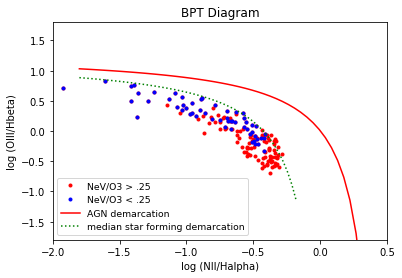

In [50]:
plt.figure()

#plt.plot(NIINEWTESTZ, OIIINEWTESTZ,'.',color='black', markersize=.25)
plt.plot(NII2NEWZ,OIII2NEWZ,'.',color = 'red', label="NeV/O3 > .25")
#plt.plot(NIINEWTEST2,OIIINEWTEST2,'.',color = 'blue')
plt.plot(NII2NEWNEVZ,OIII2NEWNEVZ,'.',color = 'blue', label="NeV/O3 < .25")
plt.plot(X,Y,'-',color = 'red', label="AGN demarcation")
#plt.plot(XII,YII,'--',color = 'blue', label="standard star forming demarcation")
plt.plot(XII,YIII,':',color = 'green', label="median star forming demarcation")
plt.legend(loc="lower left", prop={'size': 9.3})
plt.xlim([-2,.5])
plt.ylim([-1.8,1.8])

plt.xlabel('log (NII/Halpha)')
plt.ylabel('log (OIII/Hbeta)')
plt.title('BPT Diagram')

In [51]:
n2 = hdulist[1].data['NII_6584_FLUX'].tolist()
n2_err = hdulist[1].data['NII_6584_FLUX_ERR'].tolist()
ha = hdulist[1].data['H_ALPHA_FLUX'].tolist()
ha_err = hdulist[1].data['H_ALPHA_FLUX_ERR'].tolist()
o3 = hdulist[1].data['OIII_5007_FLUX'].tolist()
o3_err = hdulist[1].data['OIII_5007_FLUX_ERR'].tolist()
hb = hdulist[1].data['H_BETA_FLUX'].tolist()
hb_err = hdulist[1].data['H_BETA_FLUX_err'].tolist()
nev = hdulist[1].data['NEV_3426_FLUX'].tolist()
nev_err = hdulist[1].data['NEV_3426_FLUX_ERR'].tolist()
nev_ew = hdulist[1].data['NEV_3426_EW'].tolist()
z = hdulist[1].data['Z'].tolist()
plate = hdulist[1].data['PLATE'].tolist()
mjd = hdulist[1].data['MJD'].tolist()
fiber = hdulist[1].data['FIBERID'].tolist()

data_df1 = {'n2':n2, 'n2_err':n2_err, 
          'ha':ha, 'ha_err':ha_err, 
          'o3':o3, 'o3_err':o3_err, 
          'hb':hb, 'hb_err':hb_err, 
          'nev':nev, 'nev_err':nev_err, 'nev_ew':nev_ew, 
          'z':z, 'plate':plate, 'mjd':mjd, 'fiber':fiber}

df1 = pd.DataFrame(data_df1)

df1 = df1.where((df1.o3 > 3*(df1.o3_err)) & (df1.n2 > 3*(df1.n2_err)))
df1['x'] = np.log10(df1['n2']/df1['ha'])
df1['y'] = np.log10(df1['o3']/df1['hb'])
df1['ratio_NeO'] = (df1['nev']/df1['o3'])
df1['s/n_O'] = (df1['o3']/df1['o3_err'])
df1['s/n_Ne'] = (df1['nev']/df1['nev_err'])
df1['histerror'] = 3*df1['nev_err']
df1['dcmOAGN'] = ((cosmo.luminosity_distance(df1['z']))*(1/u.Mpc))*(3.086E+24)
df1['LNEVAGN'] = (4)*(np.pi)*(df1['histerror'])*(df1['dcmOAGN']**2)*(10**-17)
df1['LOAGN'] = (4)*(np.pi)*(df1['o3'])*(df1['dcmOAGN']**2)*(10**-17)
df1['OAGNbol_lumin'] = ((0.5617)*(np.log10(df1['LOAGN'])))+(22.186)
#df1['ratioAGN'] = (df['LOAGN']/df['LNEVAGN'])
#median_ratioAGN = np.median(df['ratioAGN'])
df1['LcorAGN'] = df1['LNEVAGN']*(15.031228538592547)
#df1['LcorAGNdiv'] = df1['LcorAGN']/1e38
df1 = df1.where( (df1.nev > 3*df1.nev_err) & (df1.o3 > 3*df1.o3_err) & (df1.n2 > 3*df1.n2_err) & (df1.z > 0.065) & (df1.nev_ew > 1) & (df1.nev_err != 0)  )
df1 = df1.where(((((0.61/(df1.x - 0.02 - 0.1833*(df1.z)))+1.2+0.03*(df1.z)) > (df1.y)) & (df1.x < 0)))
df1 = df1.where((df1.ratio_NeO < .25))
df1 = df1.dropna()

C:\Users\Austin Warren\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10
C:\Users\Austin Warren\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10


In [52]:
#df1.to_excel("NEVerrorhistthreshold.xlsx")

In [53]:
len(NII2NEWNEVZ)

55

In [54]:
len(NII2NEWZ)

146

In [55]:
len(NII2NEWNEV)

47

In [56]:
dcmOAGN = ((cosmo.luminosity_distance(Zfluxagn))*(1/u.Mpc))*(3.086E+24)
LNEVAGN = (4)*(np.pi)*(NEVAGN)*(dcmOAGN**2)*(10**-17)
LOAGN = (4)*(np.pi)*(OIIIfluxagn)*(dcmOAGN**2)*(10**-17)
OAGNbol_lumin = ((0.5617)*(np.log10(LOAGN)))+(22.186)
median_ratioAGN = np.median(LOAGN/LNEVAGN)
LcorAGN = LNEVAGN*median_ratioAGN
LcorAGNdiv = LcorAGN/(1e42)

In [57]:
np.median(LcorAGNdiv)

<Quantity 0.91595934>

In [58]:
len(LcorAGNdiv)

4032

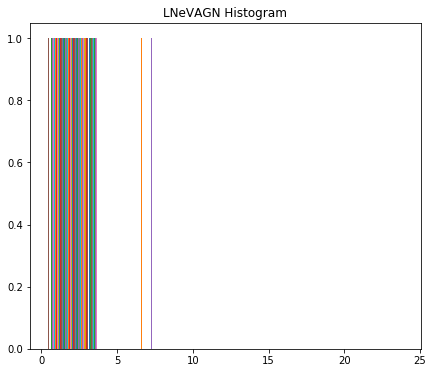

In [59]:
fig, ax = plt.subplots(figsize =(7, 6))
ax.hist(LcorAGNdiv, bins= 6)
plt.title('LNeVAGN Histogram')

plt.show()

In [60]:
print(median_ratioAGN)

15.031228538592547
